<a href="https://colab.research.google.com/github/KazumaShachou/DataScience/blob/master/Matplotlib_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Subplots

In [93]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

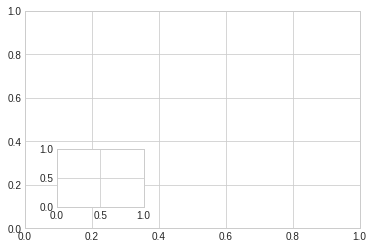

In [94]:
#plt.axes: Subplots by Hand
#plt.axes has 4 coordinates [bottom, left, width,height]
ax1 = plt.axes()
ax2 = plt.axes([0.2, 0.2, 0.2, 0.2])


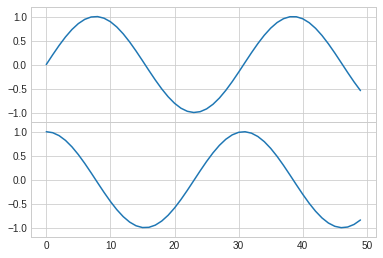

In [95]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels= [], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim= (-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

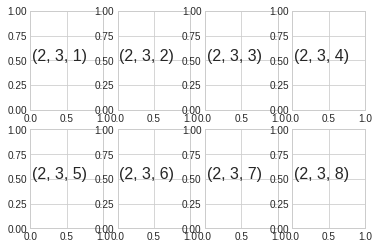

In [96]:
#plt.subplot: Simple Grids of Subplots
for i in range(1,9):
  plt.subplot(2, 4, i)
  plt.text(0.4, 0.5, str((2, 3, i)),fontsize = 16, ha = 'center')

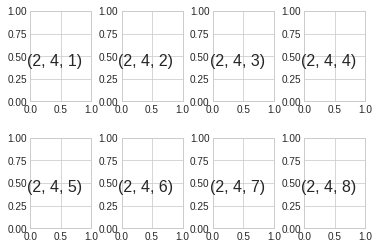

In [97]:
#spacing between these plots
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace= 0.5)
for i in range(1, 9):
  ax = fig.add_subplot(2, 4, i)
  ax.text(0.4,0.4, str((2, 4, i)), fontsize = 16, ha= 'center')

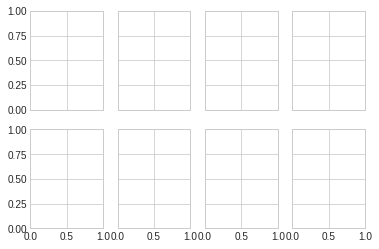

In [98]:
#plt.subplots: The Whole Grid in One Go
fix, ax = plt.subplots(2, 4, sharex= 'col', sharey = 'row')

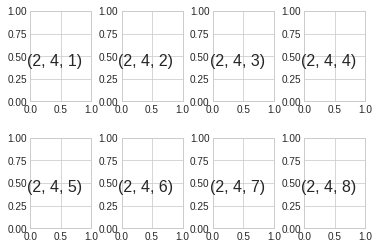

In [99]:
for i in range(2):
  for j in range(3):
    ax[i, j].text(0.5, 0.5, str((i, j)),fontsize = 16, ha = 'center')

fig

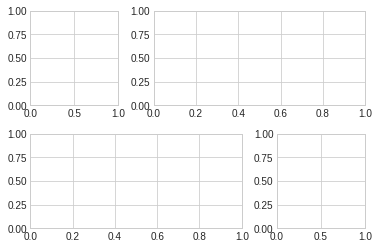

In [100]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0 , 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1,: 2])
plt.subplot(grid[1 , 2]);

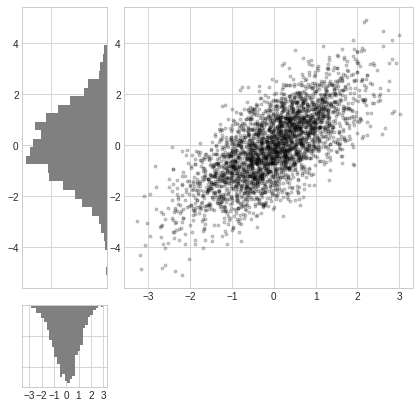

In [101]:
mean = [0,0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(7,7))
grid = plt.GridSpec(4, 4, hspace= 0.2, wspace = 0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey= main_ax)
x_hist = fig.add_subplot(grid[-1,:1], yticklabels=[], sharex = main_ax)


# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize = 3, alpha = 0.2)


x_hist.hist(x, 30, histtype= 'stepfilled', orientation = 'vertical', color = 'gray')
x_hist.invert_yaxis()
y_hist.hist(y, 30, histtype = 'stepfilled', orientation = 'horizontal', color= 'gray')
y_hist.invert_xaxis()

## Text and Annotation

In [102]:

births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':


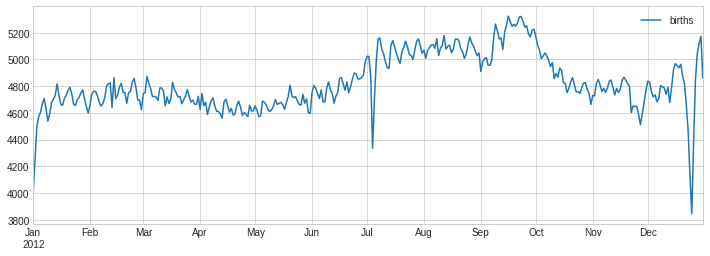

In [103]:

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

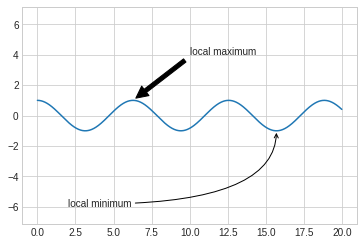

In [111]:
fig,ax = plt.subplots()
x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5* np.pi, -1), xytext=(2, -6), arrowprops = dict(arrowstyle = "->", connectionstyle = 'angle3, angleA=0, angleB=90'));

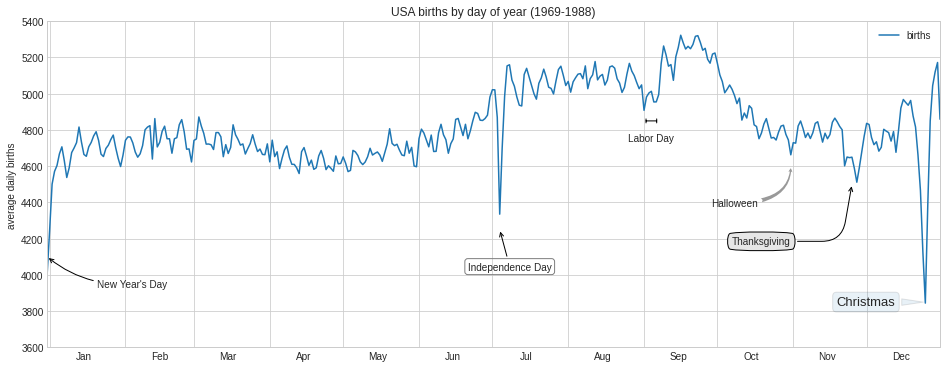

In [122]:
#using birthrate plot
fig, ax = plt.subplots(figsize=(16, 6))
births_by_date.plot(ax = ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1',4100), xycoords='data', xytext=(50,-30), 
            textcoords = 'offset points', arrowprops = dict(arrowstyle = '->', connectionstyle= 'arc3,rad=-0.2'))

ax.annotate('Independence Day', xy=('2012-7-4', 4250), xycoords= 'data', bbox = dict(boxstyle= 'round', fc= 'none', ec = 'gray'), 
              xytext= (10, -40), textcoords='offset points', ha='center', arrowprops=dict(arrowstyle= '->'))

ax.annotate('Labor Day', xy=('2012-9-4', 4850),xycoords = 'data', ha = 'center', xytext=(0, -20), textcoords='offset points')

ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),xycoords='data', textcoords='data', arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })
ax.annotate('Halloween', xy=('2012-10-31', 4600), xycoords='data',xytext=(-80, -40), textcoords='offset points',arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate('Thanksgiving', xy=('2012-11-25', 4500), xycoords='data',xytext=(-120, -60), textcoords='offset points',bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate('Christmas', xy=('2012-12-25', 3850), xycoords='data',xytext=(-30, 0), textcoords='offset points',size=13, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));
# Label the axes
ax.set(title='USA births by day of year (1969-1988)',ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
ax.set_ylim(3600, 5400);


In [ ]:
#Customizing Ticks
